In [1]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')
import matplotlib.pyplot as plt
from py_utils.annealing_brush import annealing_anion
from py_utils.annealing_brush_cation import annealing_cation
from math import sqrt
from math import exp
from math import pi
import math
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

Параметры щетки

In [2]:
#ПАРАМЕТРЫ
N = 400
Cs = 0.0008

pK_brush = 4.5
pK_minus = 3
pK_plus = 7
f_plus = 0.49

Аналитически свободная энергия при разных pH и S

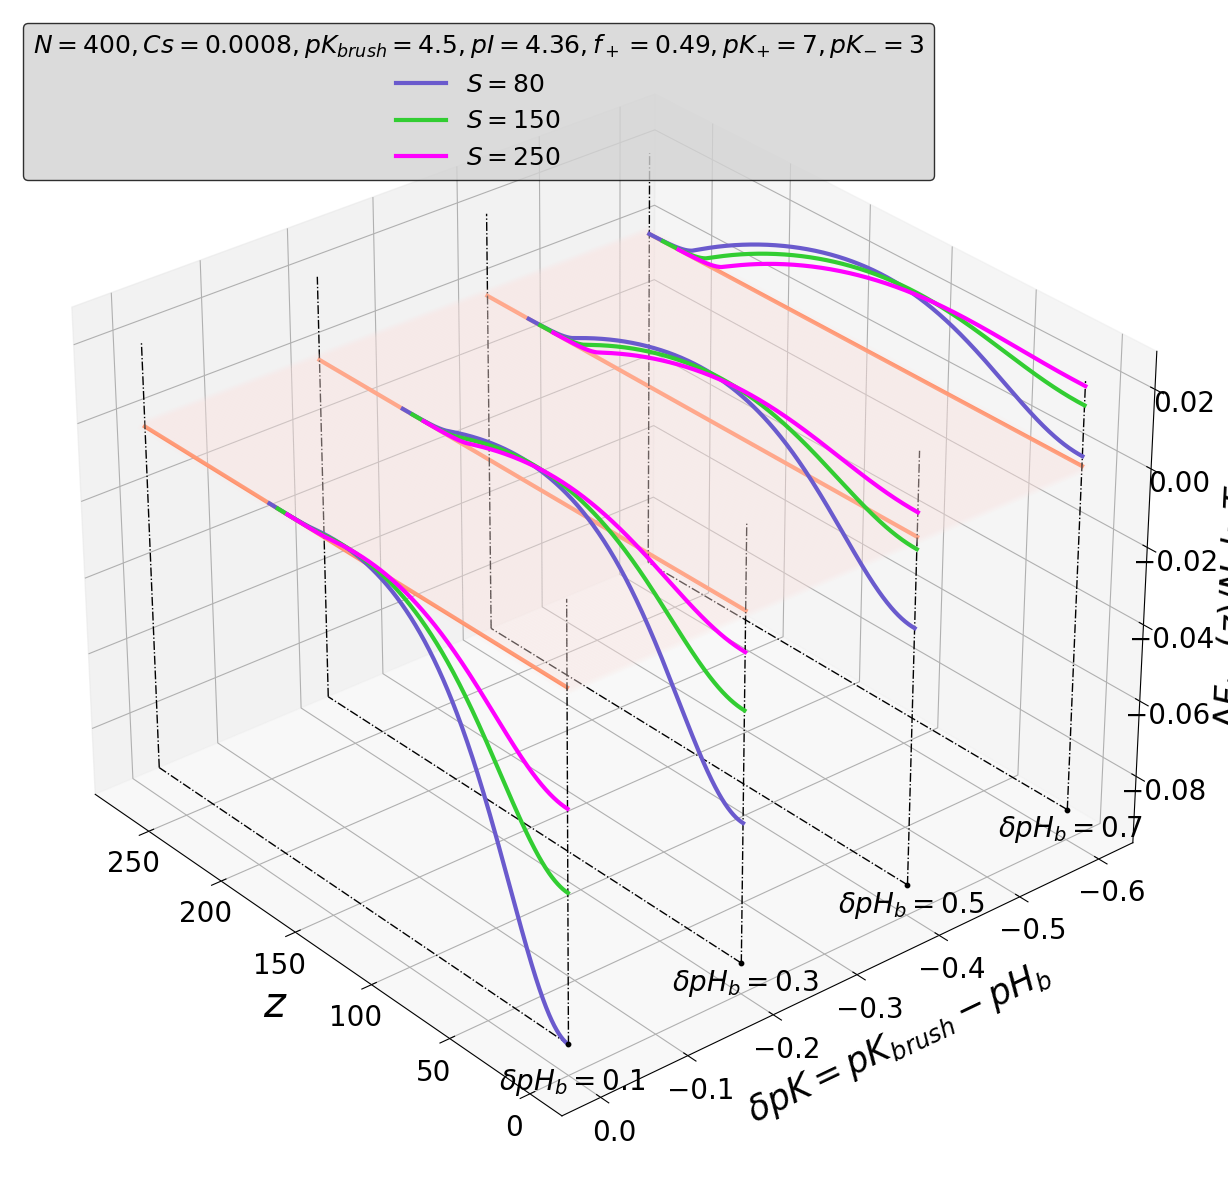

In [5]:
DPK_range = np.linspace(0, -0.6, num = 4)
S_range = [80, 150, 250]

#внешний вид кривых
colors = ['slateblue', 'limegreen', 'fuchsia']

#расчет значений для построения желтой плоскости и линий
x_delta_pH_upp, y_z_range_upp, z_f_ion_upp = [], [], []
for S in S_range:
    x_delta_pH, y_z_range, z_f_ion, pH_b_range = [], [], [], []
    for dpk in DPK_range:
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        PH_ax = dpk
        z_range = np.hstack((z_in_range, z_out_range))
        f_ion = np.hstack((f_ion_in, f_ion_out))

        #объединение в один массив
        x_delta_pH.append([PH_ax] * len(z_range))
        y_z_range.append(z_range)
        z_f_ion.append(f_ion)
        pH_b_range.append(delta_pH_b)

    
    x_delta_pH_upp.append(np.concatenate(x_delta_pH))
    y_z_range_upp.append(np.concatenate(y_z_range))
    z_f_ion_upp.append(np.concatenate(z_f_ion))


# линии на осях
f_min = min(np.concatenate(z_f_ion_upp))
f_max = max(np.concatenate(z_f_ion_upp))

x_min = min(np.concatenate(y_z_range_upp))
x_max = max(np.concatenate(y_z_range_upp))

#Построение графика
show = fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# положение подписей для \Delta pH_b
loc = [[-50, -33], [-50, -20], [-50, -20], [-50, -20]]

for pH_line, pH_b_line, locate in zip(DPK_range, pH_b_range,loc):
    ax.plot([0] * 100, np.linspace(x_min, x_max, num=100), pH_line, color='coral', alpha=1, linewidth=3,
            linestyle='-')
    ax.plot([f_min] * 100, np.linspace(x_min, x_max, num=100), pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.plot(np.linspace(f_min, f_max, num=100), [x_max] * 100, pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.plot(np.linspace(f_min, f_max, num=100), [x_min] * 100, pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.scatter(f_min, x_min, pH_line, s=10, marker='o', color='black')

    ax.annotate3D(f'$\delta pH_b = {round(pH_b_line, 1)}$', (f_min, x_min, pH_line), xytext=locate,
                  textcoords='offset points', fontsize=20)

for pH_surf in np.linspace(DPK_range[0], DPK_range[-1], num=200):
    ax.plot([0] * 200, np.linspace(x_min, x_max, num=200), pH_surf, color='mistyrose', alpha=0.1, linewidth=8,
            linestyle='-')


# Кривые для cильной щетки
for S, color in zip(S_range, colors):
    for dpk in DPK_range:
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        PH_ax = dpk
        z_range = np.hstack((z_in_range, z_out_range))
        f_ion_anion = np.hstack((f_ion_in, f_ion_out))

        ax.plot(f_ion_anion, z_range, PH_ax, color=color, linestyle = '-', linewidth = 3, label = f'$S = {S}$')

ax.set_xlabel("$\Delta F_{ion}(z)/N_\Sigma k_{B}T$", fontsize=25, labelpad=16)
ax.set_ylabel('$z$', fontsize=30, labelpad=12)
ax.set_zlabel('$\delta pK = pK_{brush} - pH_b$', fontsize=25, labelpad=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::4], labels[::4], fontsize=18,
          ncol=1,
          facecolor='lightgrey',
          edgecolor='black',
          title_fontsize='18',
          loc = 'upper left', title = f'$N = {N} , Cs = {Cs}, pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}, f_+ = {f_plus}, pK_{{+}} = {pK_plus}, pK_{{-}} = {pK_minus}$')

# f'$f_{{+}} = {f_plus}, \Delta = {math.floor(Delta)}, pH_{{IEP}} = {math.floor(pH_iep)}$'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

ax.view_init(elev=None, azim=140, roll=0, vertical_axis='x')

fig.set_figwidth(15)
fig.set_figheight(12)

fig.tight_layout()

# fig.savefig('F_ion_3D_range_S.svg', dpi = 400)

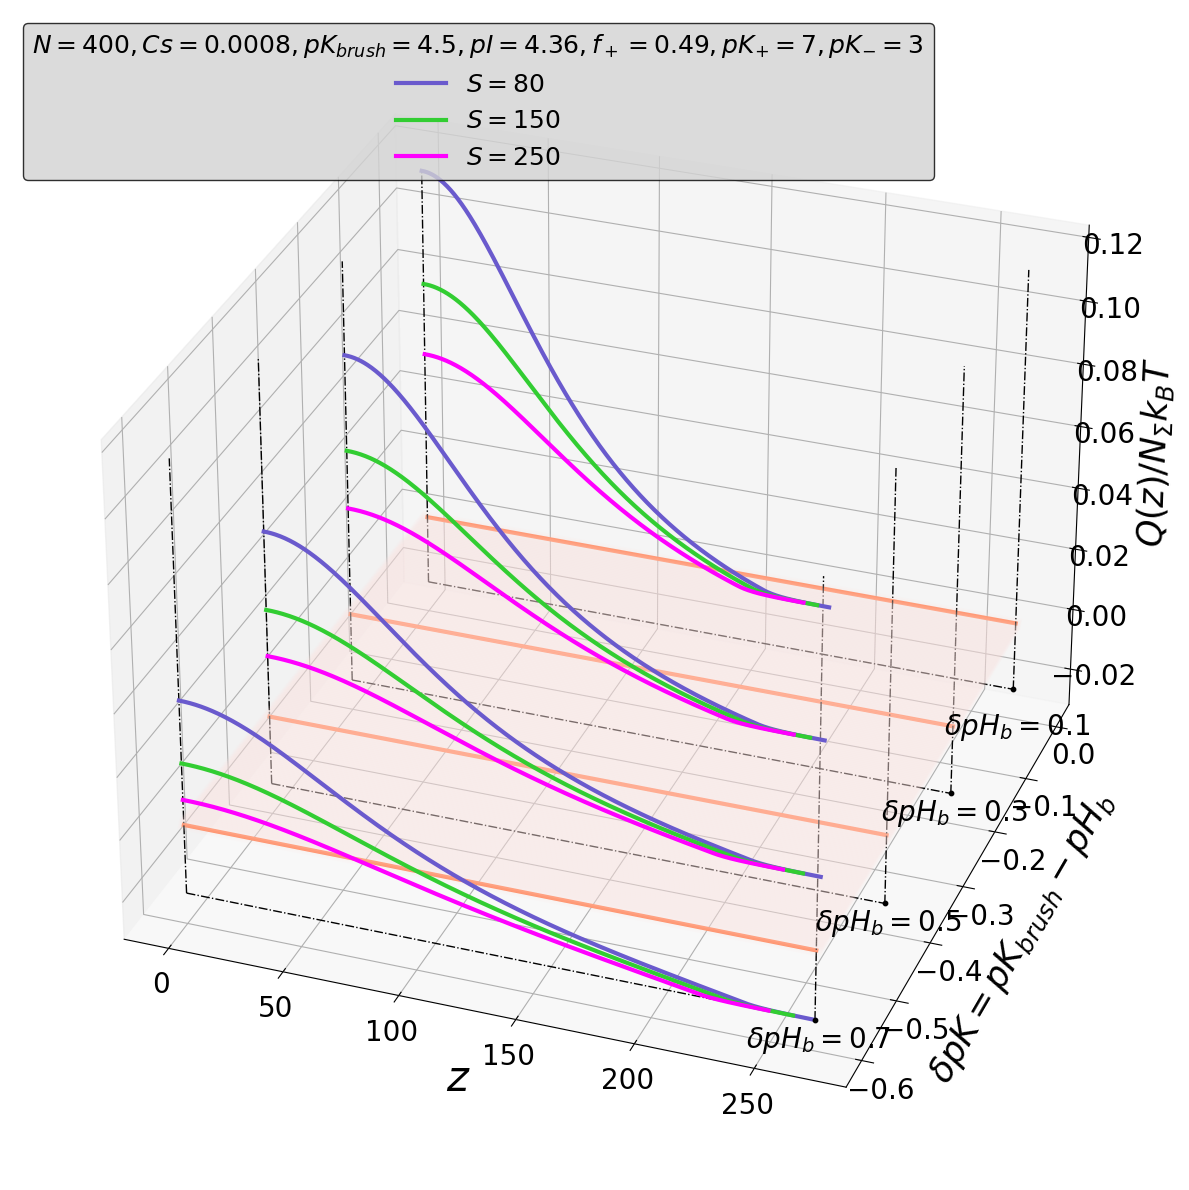

In [4]:

#расчет значений для построения желтой плоскости и линий
x_delta_pH_upp, y_z_range_upp, z_f_ion_upp = [], [], []
for S in S_range:
    x_delta_pH, y_z_range, z_f_ion, pH_b_range = [], [], [], []
    for dpk in DPK_range:
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        PH_ax = dpk
        z_range = np.hstack((z_in_range, z_out_range))
        f_ion = np.hstack((charge_in, charge_out))

        #объединение в один массив
        x_delta_pH.append([PH_ax] * len(z_range))
        y_z_range.append(z_range)
        z_f_ion.append(f_ion)
        pH_b_range.append(delta_pH_b)

    
    x_delta_pH_upp.append(np.concatenate(x_delta_pH))
    y_z_range_upp.append(np.concatenate(y_z_range))
    z_f_ion_upp.append(np.concatenate(z_f_ion))


# линии на осях
f_min = min(np.concatenate(z_f_ion_upp))
f_max = max(np.concatenate(z_f_ion_upp))

x_min = min(np.concatenate(y_z_range_upp))
x_max = max(np.concatenate(y_z_range_upp))

#Построение графика
show = fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# положение подписей для \Delta pH_b
loc = [[-50, -33], [-50, -20], [-50, -20], [-50, -20]]

for pH_line, pH_b_line, locate in zip(DPK_range, pH_b_range,loc):
    ax.plot([0] * 100, np.linspace(x_min, x_max, num=100), pH_line, color='coral', alpha=1, linewidth=3,
            linestyle='-')
    ax.plot([f_min] * 100, np.linspace(x_min, x_max, num=100), pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.plot(np.linspace(f_min, f_max, num=100), [x_max] * 100, pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.plot(np.linspace(f_min, f_max, num=100), [x_min] * 100, pH_line, color='black', alpha=1, linewidth=1,
            linestyle='-.')
    ax.scatter(f_min, x_max, pH_line, s=10, marker='o', color='black')

    ax.annotate3D(f'$\delta pH_b = {round(pH_b_line, 1)}$', (f_min, x_max, pH_line), xytext=locate,
                  textcoords='offset points', fontsize=20)

for pH_surf in np.linspace(DPK_range[0], DPK_range[-1], num=200):
    ax.plot([0] * 200, np.linspace(x_min, x_max, num=200), pH_surf, color='mistyrose', alpha=0.1, linewidth=8,
            linestyle='-')


# Кривые для cильной щетки
for S, color in zip(S_range, colors):
    for dpk in DPK_range:
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,   = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = dpk,
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')

        PH_ax = dpk
        z_range = np.hstack((z_in_range, z_out_range))
        f_ion_anion = np.hstack((charge_in, charge_out))

        ax.plot(f_ion_anion, z_range, PH_ax, color=color, linestyle = '-', linewidth = 3, label = f'$S = {S}$')

ax.set_xlabel("$Q(z)/N_\Sigma k_{B}T$", fontsize=25, labelpad=16)
ax.set_ylabel('$z$', fontsize=30, labelpad=12)
ax.set_zlabel('$\delta pK = pK_{brush} - pH_b$', fontsize=25, labelpad=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::4], labels[::4], fontsize=18,
          ncol=1,
          facecolor='lightgrey',
          edgecolor='black',
          title_fontsize='18',
          loc = 'upper left', title = f'$N = {N} , Cs = {Cs}, pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}, f_+ = {f_plus}, pK_{{+}} = {pK_plus}, pK_{{-}} = {pK_minus}$')

# f'$f_{{+}} = {f_plus}, \Delta = {math.floor(Delta)}, pH_{{IEP}} = {math.floor(pH_iep)}$'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

ax.view_init(elev=None, azim=290, roll=0, vertical_axis='x')

fig.set_figwidth(12)
fig.set_figheight(12)

fig.tight_layout()
# fig.savefig('Q_3D_range_S.svg', dpi = 400)